**Example 2.5:** Addition (averaging) of noisy images for noise reduction

This includes figure 2.26

> This code is written with Julia v1.0.0, Images v0.16.1


In [1]:
using Printf # format string in C style
using Images # core package for image

summary(ori_img) = "598×566 Array{Gray{Float32},2} with eltype Gray{Float32}"


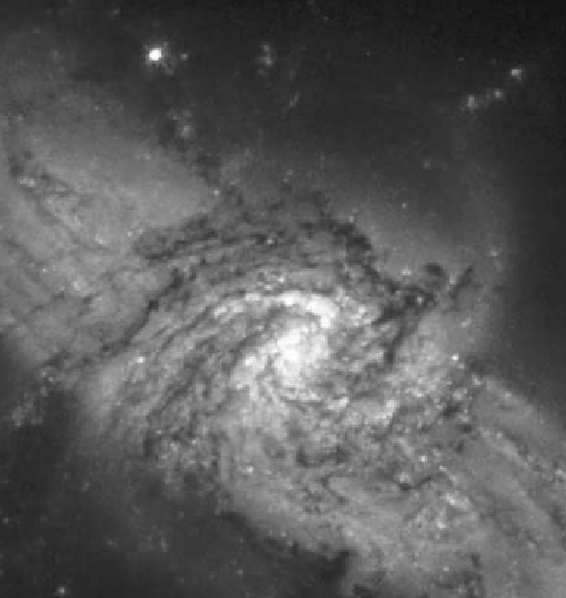

In [2]:
ori_img = load("Data/Fig0226(galaxy_pair_original).tif") .|> float32 # use Float32 to avoid unwanted overflow in N0f8
@show summary(ori_img)
ori_img

本例中的平均指的是将多张被同一guassian noise污染的图片进行求平均。相机长曝光能够削弱噪声就是根据这一原理

In [3]:
function imnoise_gaussian(img::AbstractArray{T}, variance::Number, mean::Number)::AbstractArray{T} where T
    return clamp01.(img + sqrt(variance)*randn(size(img)) .+ mean)
end
imaverage(img,num) = sum([imnoise_gaussian(img,0.01,0) for i in 1:num])/num

imaverage (generic function with 1 method)

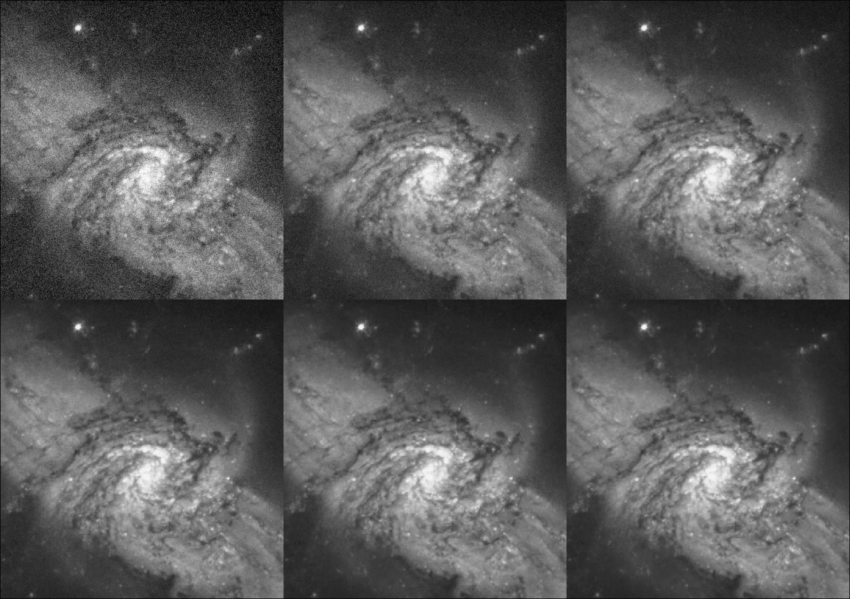

In [4]:
imgs = [imaverage(ori_img,num) for num in [1,5,10,20,50,100]]
vcat(hcat(imgs[1:3]...),hcat(imgs[4:6]...))